In [1]:
# Loading the Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Encodes the data in numerical data for performing operations for pre-processing
import nltk
import seaborn as sns
from nltk.corpus import stopwords # Importing Stop Words
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer  # Converts words in numerical value or converts words in vectors
# Or we can use TFIDF in place of CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,CategoricalNB,ComplementNB,BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1') # Loading the Dataset
# Latin - 1 is the type of data in csv in order to make readable for the pandas
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape # Finding out size of data

(5572, 5)

### Data Cleaning
1. Data Cleaning
2. EDA (Exploratory Data Analysis)
3. Text Preprocessing (Removing Noise from the text(stem,puntuation,suffices and stop words that do not give us any information))
4. Model building
5. Evaluation
6. Improvement Depending upon the evaluation

### 1. Data Cleaning

In [4]:
# Dropping the last 3 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True) # Renaming the Column names

In [8]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Label Encoder
encoder = LabelEncoder() # Loading the Encoder for converting the data in the numerical format for the pre processing

In [10]:
df['Target'] = encoder.fit_transform(df['Target']) # Transforms the Target into Binary Format
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df.isnull().sum() # Missing Data

Target    0
Text      0
dtype: int64

In [12]:
df.duplicated().sum() # Duplicated Data

403

In [13]:
df = df.drop_duplicates(keep='first') # Keeping the First Value and removing the rest

In [14]:
df.duplicated().sum() # Checking the Duplicated Data

0

In [15]:
df.shape # 403 Rows are dropped

(5169, 2)

### 2. EDA(Exploratory Data Analysis)

### 2.1 How Much Data is spam and ham

In [16]:
df['Target'].value_counts() # Gives us the count of the Binary values(Ham and Spam)

0    4516
1     653
Name: Target, dtype: int64

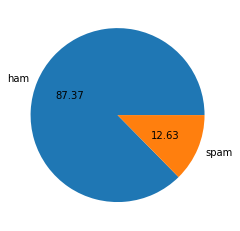

In [17]:
plt.pie(df['Target'].value_counts(),autopct="%0.2f",labels=['ham','spam']) # Making a Pie chart of the spam and ham
plt.show()

#### Now we analyse:
1. Counts of Alphabet,Words and Sentences in a data entry
2. For Deeper Analysis, We add 3 new columns in the dataset

    i) Number of characters in the entry
    
    ii) Number of words in the entry
    
    iii) Number of sentances in the entry

In [18]:
# Downloading the NLTK Libraries
nltk.download('punkt') # It tokenizes the the entries in words and sentances

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JANISH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_character'] = df['Text'].apply(len) # It calculates the length of the text rows and add it to a new row corrosponding to
# it.

C:\Users\JANISH\AppData\Local\Temp/ipykernel_1984/3533756088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character'] = df['Text'].apply(len) # It calculates the length of the text rows and add it to a new row corrosponding to


In [20]:
df.head()

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x))) # It calculates the words in the text column as tokens

C:\Users\JANISH\AppData\Local\Temp/ipykernel_1984/216768397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x))) # It calculates the words in the text column as tokens


In [22]:
df.head()

,Target,Text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x))) # Calculates the Sentences in the corrosponding 
# text column

C:\Users\JANISH\AppData\Local\Temp/ipykernel_1984/2044886298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x))) # Calculates the Sentences in the corrosponding


In [24]:
df.head()

,Target,Text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_character','num_words','num_sentence']].describe()  # Exploring the the function of the 3 values we have found out 
# in the eda of the text column

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Target         5169 non-null   int32 
 1   Text           5169 non-null   object
 2   num_character  5169 non-null   int64 
 3   num_words      5169 non-null   int64 
 4   num_sentence   5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [27]:
# Analysis of ham messages
df[df['Target'] == 0][['num_character','num_words','num_sentence']].describe() # Displays the stats of the rows with 0 in target
# column

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# Analysis of spam messages
df[df['Target'] == 1][['num_character','num_words','num_sentence']].describe() # Displays the stats of the rows with 0 in target
# column

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [29]:
df1 = df # Cloning the database for the further use

<AxesSubplot:ylabel='Count'>

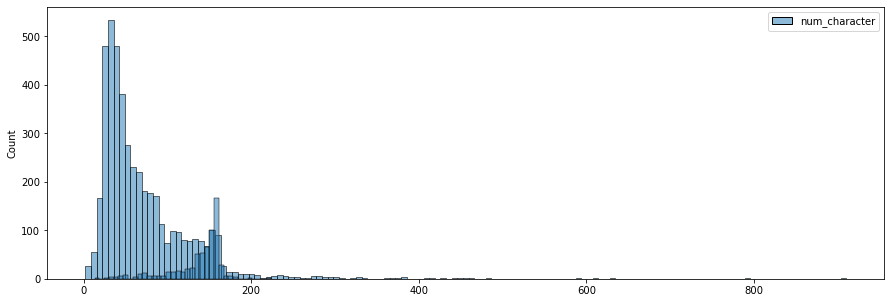

In [30]:
plt.figure(figsize=(15,5)) # We are finding out patterns of ham and spam based on characters
sns.histplot(df[df['Target']==0][['num_character']])
sns.histplot(df[df['Target']==1][['num_character']],color = 'blue')

<AxesSubplot:ylabel='Count'>

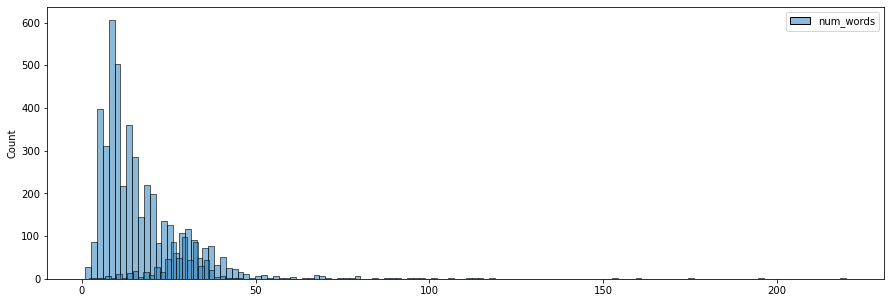

In [31]:
plt.figure(figsize=(15,5)) # We are finding out patterns of ham and spam based on words
sns.histplot(df[df['Target']==0][['num_words']])
sns.histplot(df[df['Target']==1][['num_words']],color = 'blue')

<AxesSubplot:ylabel='Count'>

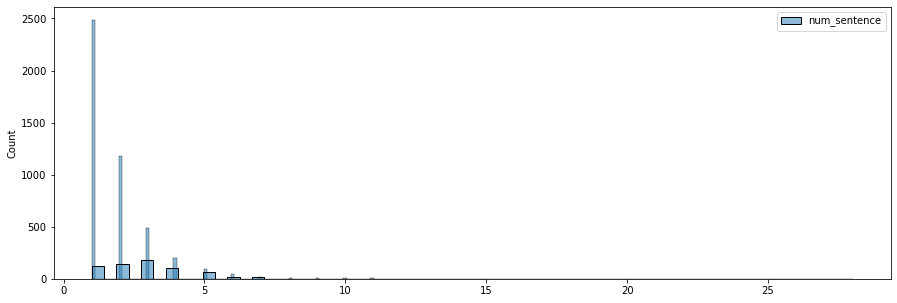

In [32]:
plt.figure(figsize=(15,5)) # We are finding out patterns of ham and spam based on sentences
sns.histplot(df[df['Target']==0][['num_sentence']])
sns.histplot(df[df['Target']==1][['num_sentence']],color = 'blue')

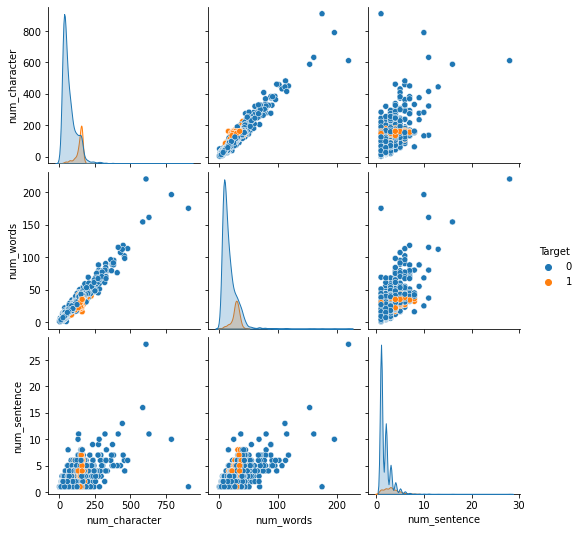

In [33]:
sns.pairplot(df,hue='Target') # We can identify the outliers and relations of data with each other
# We can find out the co relation of the two colummns

<AxesSubplot:>

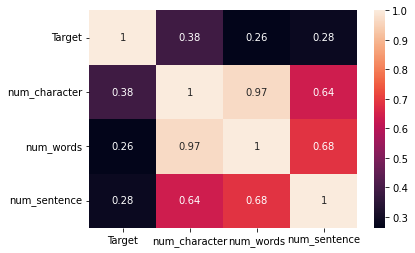

In [34]:
sns.heatmap(df.corr(),annot=True) # Heatmap tells us the co relation if nearer to 1 it is important and if nearer to 0 then 
# It is not important.
# If value is near to 1 it is important co relation for the result of the database

In [35]:
# Conclusion we can draw from (num_words and num_character),(num_character and num_words) is highly dependant as its value 
# is 0.97
# Another conclusion we can draw is that lateral axis co relation is more important

### 3. Text Pre-Processing
1. lower case
2. Tokenization
3. Removing Special Character
4. Removing stop word and puntuation
5. Stemming

In [36]:
df

,Target,Text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [37]:
nltk.download('stopwords') # Stop Words do not change the meaning the sentence if removed
stopwords.words('english') # 179 Stop Words in english Langauge

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JANISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
string.punctuation # Shows list of puntuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
ps = PorterStemmer()
ps.stem('hacking') # Removes the ing or any other 

'hack'

In [40]:
def text_transform(text):
    text = text.lower() # Lowers text
    text = nltk.word_tokenize(text) # To Tokenize the text
    y = []
    for i in text:
        if i.isalnum():
            y.append(i) # Appending special characters in the y list
    text = y[:]
    y.clear()
    for i in text:  # Removing Stop Words
        if i not in stopwords.words('english') and i not in string.punctuation: # Removing punctuations
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [41]:
text_transform('I am Living in Indore!')

'live indor'

In [42]:
# This is only for english Language pre processing

In [43]:
# Applying the above function text_transform to the column 'Text'
df['text_transform'] = df['Text'].apply(text_transform)

C:\Users\JANISH\AppData\Local\Temp/ipykernel_1984/1254941058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_transform'] = df['Text'].apply(text_transform)


In [44]:
df.head()

,Target,Text,num_character,num_words,num_sentence,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
df.tail()

,Target,Text,num_character,num_words,num_sentence,text_transform
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name


In [46]:
nltk.download('stopwords') # Stop Words do not change the meaning the sentence if removed
stopwords.words() # 179 Stop Words in english Langauge

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JANISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [47]:
string.punctuation # Shows list of puntuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
ps = PorterStemmer()
ps.stem('hacking') # Removes the ing or any other 

'hack'

In [49]:
def text_transform(text):
    text = text.lower() # Lowers text
    text = nltk.word_tokenize(text) # To Tokenize the text
    y = []
    for i in text:
        if i.isalnum():
            y.append(i) # Appending special characters in the y list
    text = y[:]
    y.clear()
    for i in text:  # Removing Stop Words
        if i not in stopwords.words() and i not in string.punctuation: # Removing punctuations
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [50]:
# Above method processes the data for the all languages

In [51]:
# Applying the above function text_transform to the column 'Text'
df1['text_transform'] = df1['Text'].apply(text_transform)

C:\Users\JANISH\AppData\Local\Temp/ipykernel_1984/344968711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text_transform'] = df1['Text'].apply(text_transform)


In [52]:
df1.head()

,Target,Text,num_character,num_words,num_sentence,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi great world b...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,dun say earli hor alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,think goe usf live around though


In [53]:
df1.tail()

,Target,Text,num_character,num_words,num_sentence,text_transform
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact pound prize 2 claim eas...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true


In [54]:
df.to_csv("spamdetection_english.csv") # Cleaned Data of English Language of all stop words

In [55]:
df1.to_csv("spamdetection_all_languages.csv") # Cleaned Data of All languages of all stop words

In [56]:
# Designing the word cloud of the Spam Messages
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white') # Word Cloud is stored in wc object and 
# parameters are given such as width,height,etc.
wc_spam = wc.generate(df[df['Target']==1]['text_transform'].str.cat(sep=" ")) # generates the pictorial form of the spam words

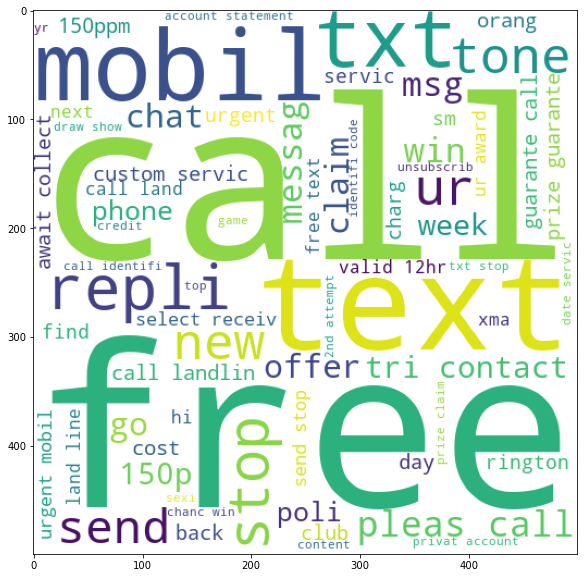

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(wc_spam)# Word Cloud is generated which is the collection of all the spam words in the wc_spam
plt.show()

In [58]:
# Designing Word Cloud of ham messages
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black') # Word Cloud is stored in wc object and 
wc_ham = wc.generate(df[df['Target']==0]['text_transform'].str.cat(sep=" ")) # generates the pictorial form of the ham words

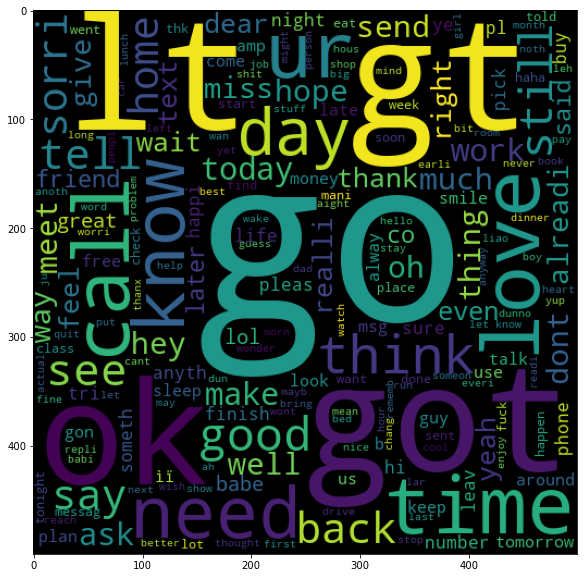

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(wc_ham)# Word Cloud is generated which is the collection of all the ham words in the wc_spam
plt.show()

In [60]:
# Finding out Most Common Words in spam
spam_corpus = []
for msg in df[df['Target']==1]['text_transform'].to_list():
    for word in msg.split():
        spam_corpus.append(word) # Appended all the words in the spam list

In [61]:
len(spam_corpus)

9508

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


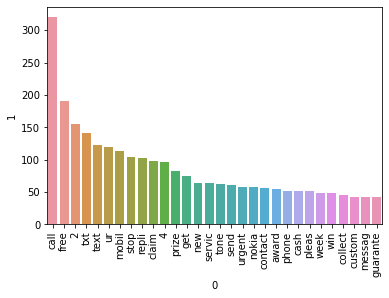

In [62]:
# Plotting the spam barplot
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# Takes the top 30 most recurring words in the data
plt.xticks(rotation='vertical')
plt.show()

In [63]:
# Finding out Most Common Words in ham
ham_corpus = []
for msg in df[df['Target']==0]['text_transform'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

31747

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


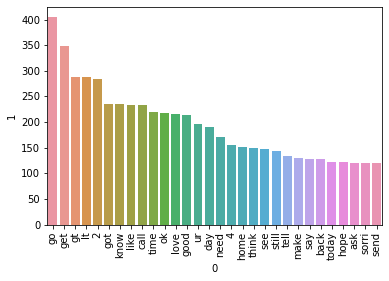

In [65]:
# Plotting the ham spam graph
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4. Building the Model

In [66]:
cv = CountVectorizer()
X = cv.fit_transform(df['text_transform']).toarray() # Converted the text in array

In [67]:
X.shape # X is a sparce matrix

(5169, 6592)

In [68]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
y = df['Target'].values  # Has ham and Spam Values
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
# Train the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

### Naive bayes gives the best result for textual analysis

In [71]:
cf = GaussianNB()
cf.fit(X_train,y_train)
yp = cf.predict(X_test)
print("Accuracy Score: ",metrics.accuracy_score(yp,y_test)*100,"%")
print("Confusion Matrix: \n",metrics.confusion_matrix(yp,y_test))
print("Mean Absoulte Error: ",metrics.mean_absolute_error(yp,y_test)*100)

Accuracy Score:  85.1063829787234 %
Confusion Matrix: 
 [[767  16]
 [138 113]]
Mean Absoulte Error:  14.893617021276595


In [72]:
cf = MultinomialNB()
cf.fit(X_train,y_train)
yp = cf.predict(X_test)
print("Accuracy Score: ",metrics.accuracy_score(yp,y_test)*100,"%")
print("Confusion Matrix: \n",metrics.confusion_matrix(yp,y_test))
print("Mean Absoulte Error: ",metrics.mean_absolute_error(yp,y_test)*100)

Accuracy Score:  96.90522243713733 %
Confusion Matrix: 
 [[885  12]
 [ 20 117]]
Mean Absoulte Error:  3.0947775628626695


In [73]:
cf = ComplementNB()
cf.fit(X_train,y_train)
yp = cf.predict(X_test)
print("Accuracy Score: ",metrics.accuracy_score(yp,y_test)*100,"%")
print("Confusion Matrix: \n",metrics.confusion_matrix(yp,y_test))
print("Mean Absoulte Error: ",metrics.mean_absolute_error(yp,y_test)*100)

Accuracy Score:  92.94003868471954 %
Confusion Matrix: 
 [[841   9]
 [ 64 120]]
Mean Absoulte Error:  7.0599613152804634


In [74]:
cf = BernoulliNB()
cf.fit(X_train,y_train)
yp = cf.predict(X_test)
print("Accuracy Score: ",metrics.accuracy_score(yp,y_test)*100,"%")
print("Confusion Matrix: \n",metrics.confusion_matrix(yp,y_test))
print("Mean Absoulte Error: ",metrics.mean_absolute_error(yp,y_test)*100)

Accuracy Score:  96.90522243713733 %
Confusion Matrix: 
 [[901  28]
 [  4 101]]
Mean Absoulte Error:  3.0947775628626695


### Categorial Naive Bayes Does not work for this data

### Conclusion we draw from the above anaylsis is BernoulliNB works best for the textual analysis

In [75]:
tv = TfidfVectorizer()
X = tv.fit_transform(df['text_transform']).toarray() # Converted the text in array
X.shape # X is a sparce matrix
y = df['Target'].values  # Has ham and Spam Values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)
cf = BernoulliNB()
cf.fit(X_train,y_train)
yp = cf.predict(X_test)
print("Accuracy Score: ",metrics.accuracy_score(yp,y_test)*100,"%")
print("Confusion Matrix: \n",metrics.confusion_matrix(yp,y_test))
print("Mean Absoulte Error: ",metrics.mean_absolute_error(yp,y_test)*100)

Accuracy Score:  96.90522243713733 %
Confusion Matrix: 
 [[901  28]
 [  4 101]]
Mean Absoulte Error:  3.0947775628626695


### Same analysis be used with TfidfVectorizer with same results